In [4]:
import sys
sys.path.append('../code/')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
import os
from sklearn.preprocessing import StandardScaler
import nibabel as nib

from nilearn import datasets, plotting
from nilearn.maskers import NiftiMapsMasker

import utils

from sklearn.covariance import GraphicalLassoCV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from nilearn.connectome import ConnectivityMeasure
import numpy as np
from nilearn import plotting

import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

import umap



In [5]:
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas["maps"]
# Loading atlas data stored in 'labels'
labels = atlas["labels"]

df = pd.read_pickle('../data/developmental_df.pkl')
n_subjects = len(np.unique(df['subj'].values))

(39, 39)

In [78]:
time_series = df.iloc[:,:-1].values
pca = PCA(n_components=39)
points = pca.fit_transform(time_series)

correlation_matrix = np.corrcoef(time_series.T)


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, -0.2, '−0.2'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4000000000000001, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0000000000000002, '1.0'),
  Text(0, 1.2000000000000002, '1.2')])

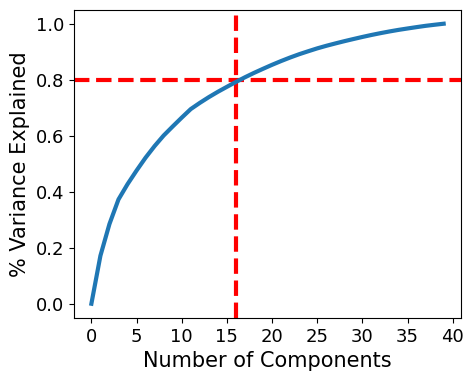

In [79]:
labelsize = 15
ticksize = 13

plt.figure(figsize=(5,4))

explained_var = np.cumsum(pca.explained_variance_ratio_)
explained_var = np.concatenate([[0], explained_var])
thresh_pos = np.argmin(np.abs(explained_var - 0.8))

plt.axhline(y=0.80, color='r', linestyle='--', linewidth=3)
plt.axvline(x=thresh_pos, color='r', linestyle='--', linewidth=3)

plt.plot(explained_var, color='C0', linewidth=3)

plt.xlabel('Number of Components', fontsize=labelsize)
plt.ylabel('% Variance Explained', fontsize=labelsize)
plt.xticks(fontsize=ticksize)
plt.yticks(fontsize=ticksize)


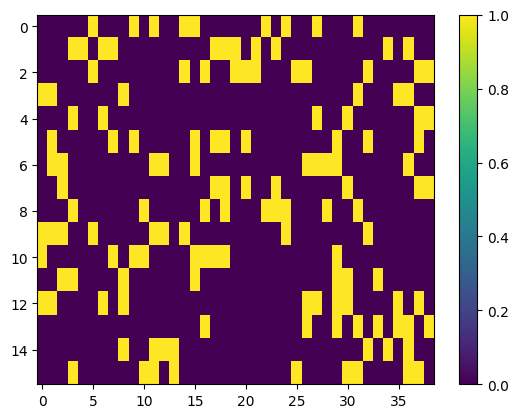

In [80]:
loadings_threshold = 0.2

plt.imshow(np.abs(pca.components_[:thresh_pos,:]) > loadings_threshold , aspect='auto')
plt.colorbar()

In [92]:
n_regions = len(labels)
coords = np.array(atlas.region_coords)
functional_networks = list()
coords_list = list()

for pca_idx in range(thresh_pos):
    region_idx = np.where(np.abs(pca.components_[pca_idx,:]) > loadings_threshold)[0]
    num_nodes = len(region_idx)
    temp_network = np.zeros((num_nodes, num_nodes))
    for i in range(num_nodes):
        for j in range(num_nodes):
            node1, node2 = region_idx[i], region_idx[j]
            temp_network[i, j] = correlation_matrix[node1, node2]
    
    functional_networks.append(temp_network)
    coords_list.append(coords[np.in1d(range(n_regions),region_idx), :])


IndexError: list index out of range

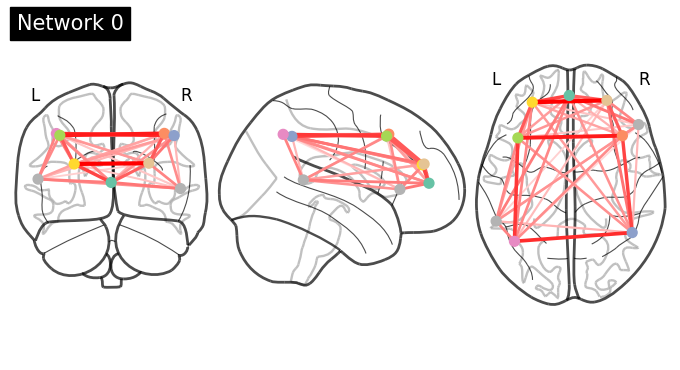

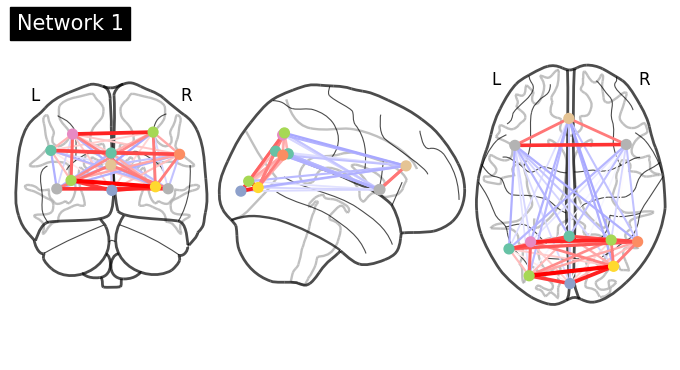

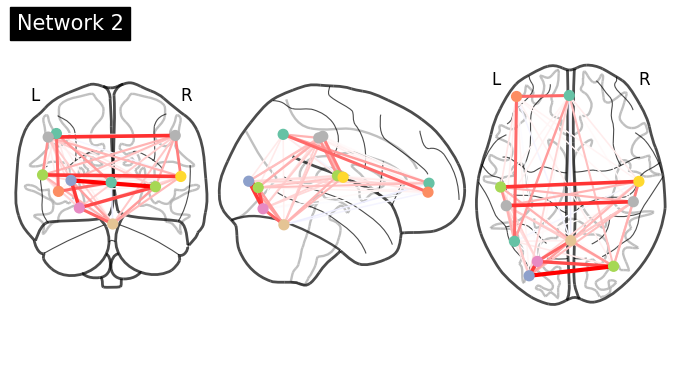

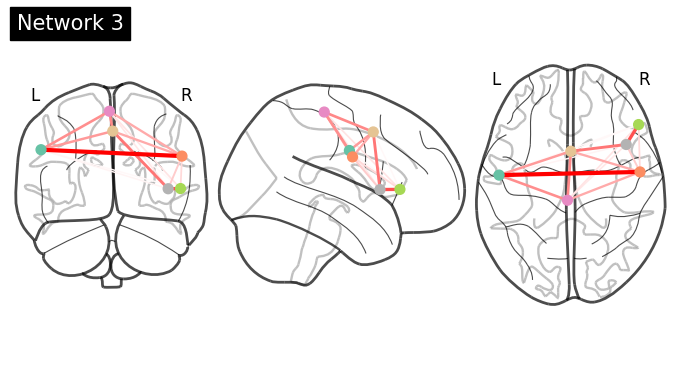

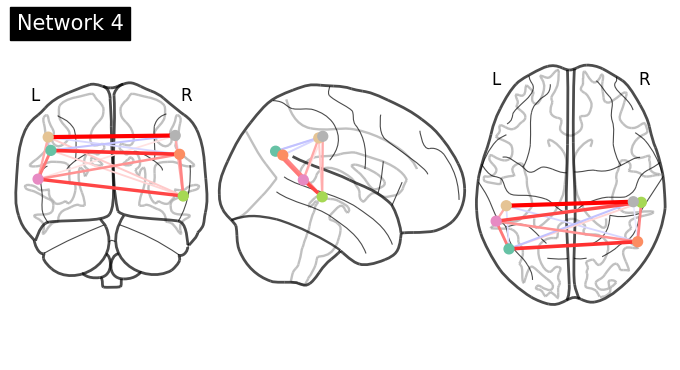

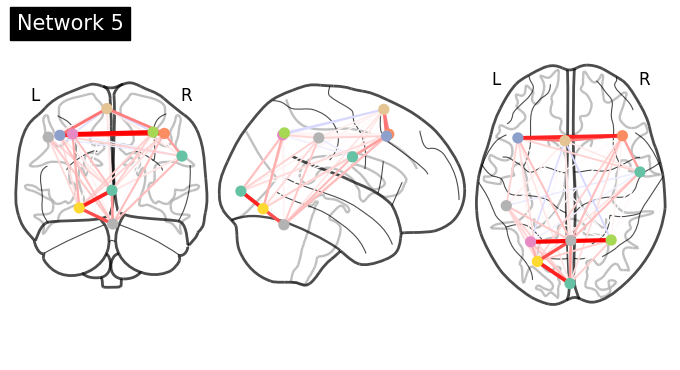

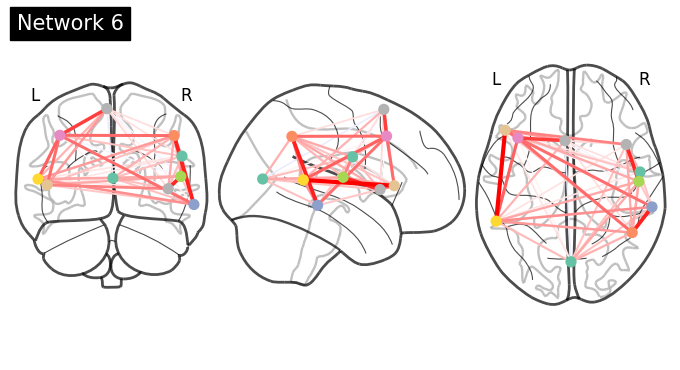

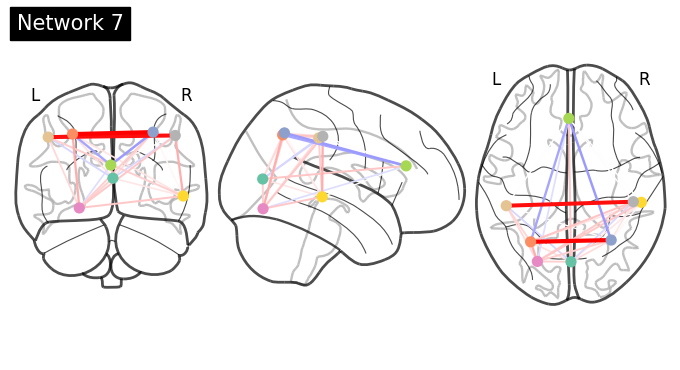

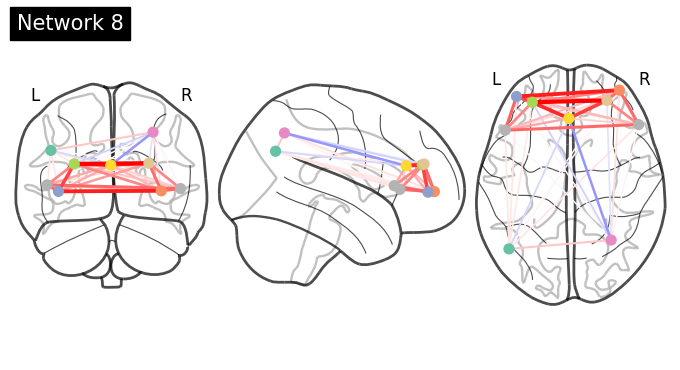

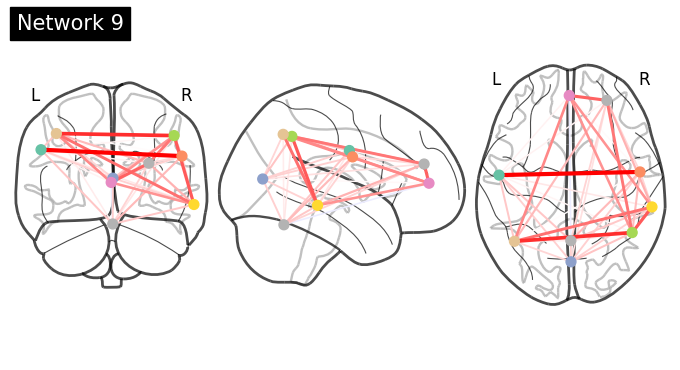

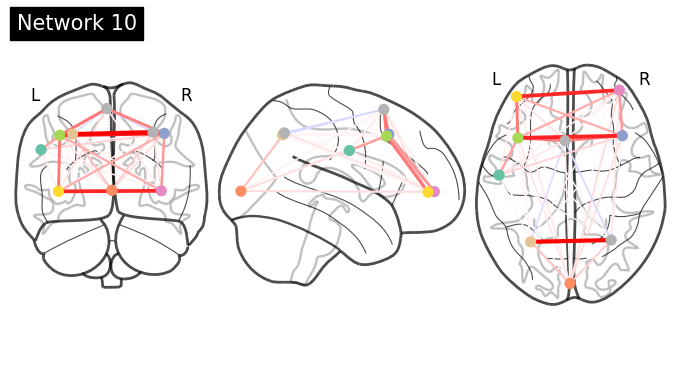

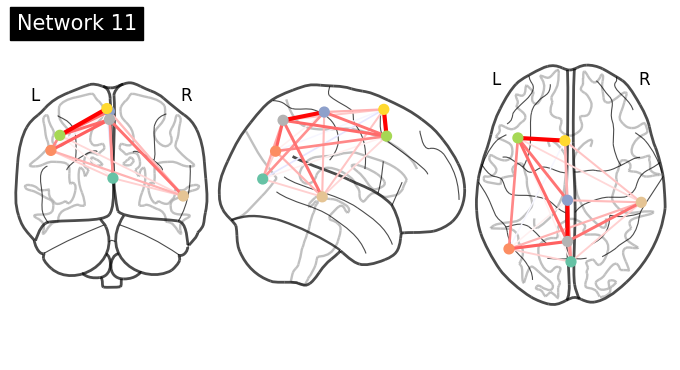

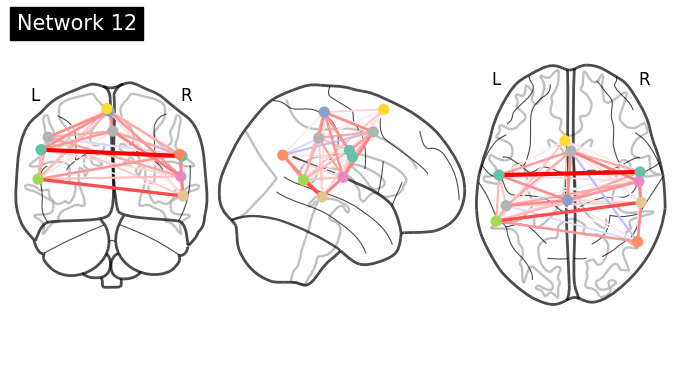

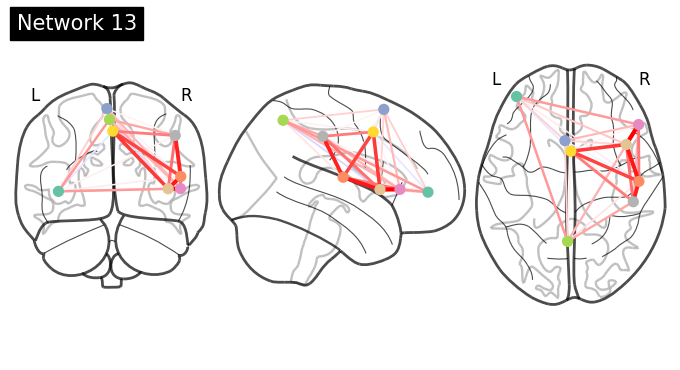

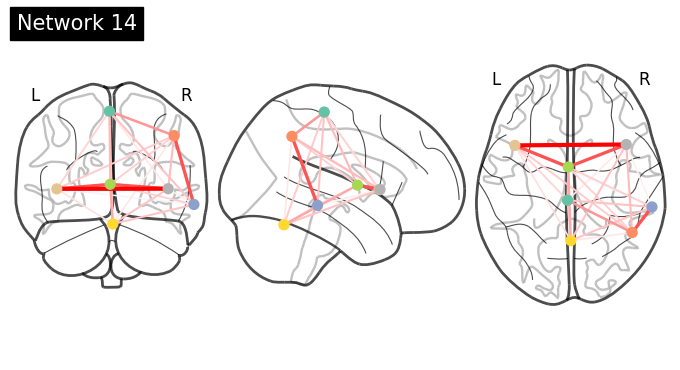

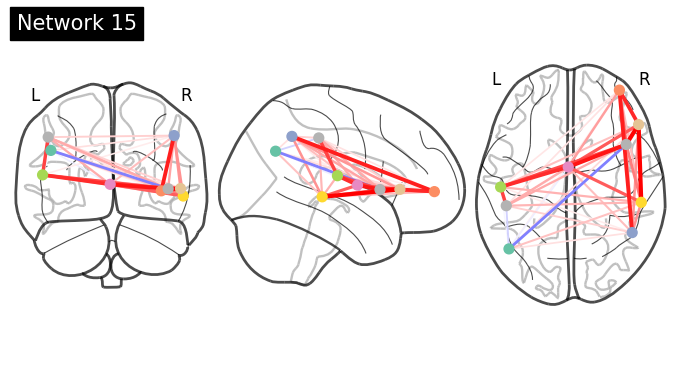

In [96]:
coords = atlas.region_coords

for net_idx in range(18):
    plotting.plot_connectome(functional_networks[net_idx], coords_list[net_idx], title=f'Network {net_idx}')
# plotting.show()